In [1]:
%matplotlib widget

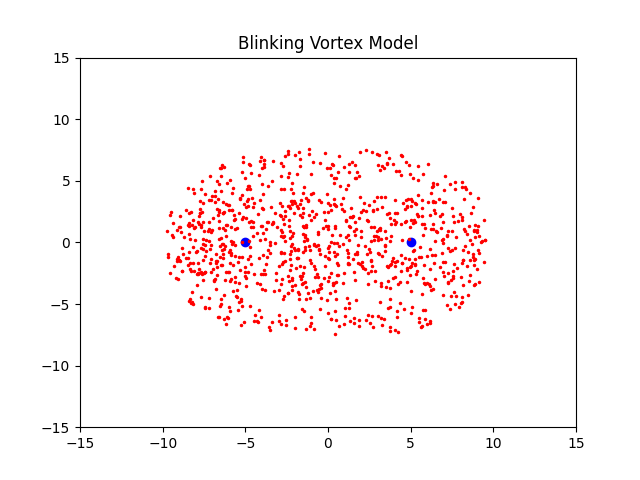

In [9]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(x_init, y_init, ax, xm, ym, xvort1, yvort1, xvort2, yvort2, T, Omega, Nsect):
    integration_steps = 2000
    h = T / integration_steps

    xsect = np.empty(Nsect)
    ysect = np.empty(Nsect)

    x, y = x_init, y_init

    for isect in range(Nsect):
        if isect % 2 == 0:  # Even index, right vortex active
            xc, yc = xvort2, yvort2
        else:  # Odd index, left vortex active
            xc, yc = xvort1, yvort1

        for _ in range(integration_steps - 1):
            x0, y0 = x, y
            r1sq = (x0 - xc)**2 + (y0 - yc)**2
            x = x0 - Omega * (y0 - yc) / r1sq * h
            y = y0 + Omega * (x0 - xc) / r1sq * h

        xsect[isect] = x
        ysect[isect] = y

    # Clear the previous plot and redraw
    ax.clear()
    ax.set_xlim([-xm, xm])
    ax.set_ylim([-ym, ym])
    ax.plot([xvort1, xvort2], [yvort1, yvort2], 'b.', markersize=12)
    ax.plot(xsect, ysect, '.r', markersize=3)
    ax.set_title("Blinking Vortex Model")
    plt.draw()

def on_click(event, ax, xm, ym, xvort1, yvort1, xvort2, yvort2, T, Omega, Nsect):
    if event.inaxes == ax:
        run_simulation(event.xdata, event.ydata, ax, xm, ym, xvort1, yvort1, xvort2, yvort2, T, Omega, Nsect)

def blink_map():
    xm, ym = 15, 15  # window size
    xvort1, yvort1 = -5, 0  # location of vortex 1
    xvort2, yvort2 = 5, 0   # location of vortex 2
    T, Omega = 5, 10  # Default values
    Nsect = 1000 #5000

    fig, ax = plt.subplots()
    fig.canvas.mpl_connect('button_press_event', lambda event: on_click(event, ax, xm, ym, xvort1, yvort1, xvort2, yvort2, T, Omega, Nsect))

    # Initial run of the simulation
    run_simulation(0.0, 2.0, ax, xm, ym, xvort1, yvort1, xvort2, yvort2, T, Omega, Nsect)

    plt.show()

blink_map()
